In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [54]:
IMAGE_SIZE = 64

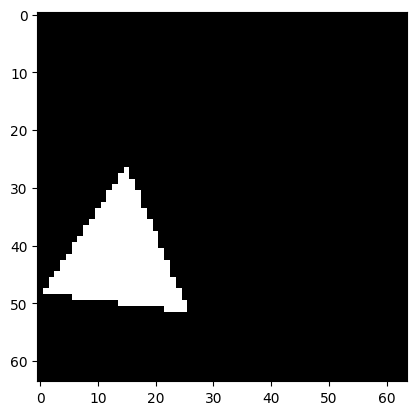

In [142]:
import random

from numpy.typing import NDArray


def square(x, y, z):
    return 0.5 * abs(x[0] * (y[1] - z[1]) + y[0] * (z[1] - x[1]) + z[0] * (x[1] - y[1]))


def generate_point() -> tuple[int, int]:
    result = IMAGE_SIZE // 2 + np.random.randn(2) * 16
    return tuple(result.astype('int32').clip(0, IMAGE_SIZE))


def generate_triangle() -> NDArray:
    image = np.zeros((IMAGE_SIZE, IMAGE_SIZE, 1))
    points = [generate_point() for _ in range(3)]
    while square(*points) < 30:
        points = [generate_point() for _ in range(3)]
    cv2.drawContours(
        image,
        [np.array(points)],
        0, (1,), -1
    )
    return image


def generate_rectangle() -> NDArray:
    image = np.zeros((IMAGE_SIZE, IMAGE_SIZE, 1))
    points = [generate_point() for _ in range(2)]
    while (abs(points[0][0] - points[1][0]) * abs(points[0][1] - points[1][1])) < 30:
        points = [generate_point() for _ in range(2)]

    cv2.rectangle(
        image,
        *points,
        (1,), -1
    )
    return image


plt.imshow(generate_triangle(), cmap='gray')

In [151]:
from pathlib import Path

N_TRAIN = 1000
N_TEST = 100

output = Path('../data/figures')

In [152]:
from tqdm import trange

for i in trange(N_TRAIN):
    triangle = generate_triangle()
    cv2.imwrite(str(output / 'train' / 'triangles' / f'{i}.png'), (255 * triangle).astype('uint8'))
    
for i in trange(N_TRAIN):
    rectangle = generate_rectangle()
    cv2.imwrite(str(output / 'train' / 'rectangles' / f'{i}.png'), (255 * rectangle).astype('uint8'))

for i in trange(N_TEST):
    triangle = generate_triangle()
    cv2.imwrite(str(output / 'test' / 'triangles' / f'{i}.png'), (255 * triangle).astype('uint8'))
    
for i in trange(N_TEST):
    rectangle = generate_rectangle()
    cv2.imwrite(str(output / 'test' / 'rectangles' / f'{i}.png'), (255 * rectangle).astype('uint8'))

100%|██████████| 100/100 [00:00<00:00, 1192.64it/s]
